# Chapter 2: Approaching Simple Linear Regression

## Setting up your working environment

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston() 
california = fetch_california_housing()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
%matplotlib inline 
# If you are using IPython, this will make the images available in the notebook

## Some examples handling vectors and mtrices with NumPy 

In [4]:
import numpy as np

vector = np.array([1,2,3,4,5])
row_vector = vector.reshape((5,1))
column_vector = vector.reshape((1,5))

single_feature_matrix = vector.reshape((1,5))
single_feature_matrix = np.array([[1],[2],[3],[4],[5]])

multiple_feature_matrix = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])

In [5]:
all_zeros = np.zeros((5,3))
all_ones = np.ones((5,3))

## Representing a normal distribution

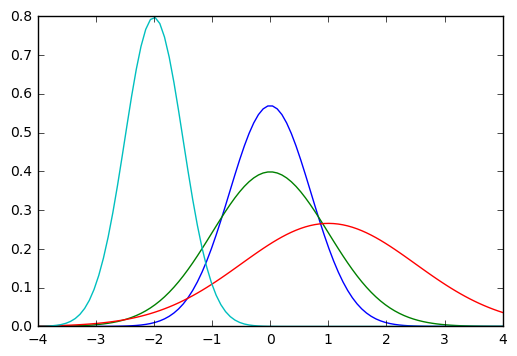

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

x = np.linspace(-4,4,100)
for mean, variance in [(0,0.7),(0,1),(1,1.5),(-2,0.5)]:
    sigma = math.sqrt(variance)
    plt.plot(x,mlab.normpdf(x,mean,variance))
plt.show()

## Working with the Boston dataset

In [7]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target'] = boston.target

In [8]:
mean_expected_value = dataset['target'].mean()

In [9]:
Squared_errors = pd.Series(mean_expected_value -\
                           dataset['target'])**2 
SSE = np.sum(Squared_errors)
print ('Sum of Squared Errors (SSE): %01.f' % SSE)

Sum of Squared Errors (SSE): 42716


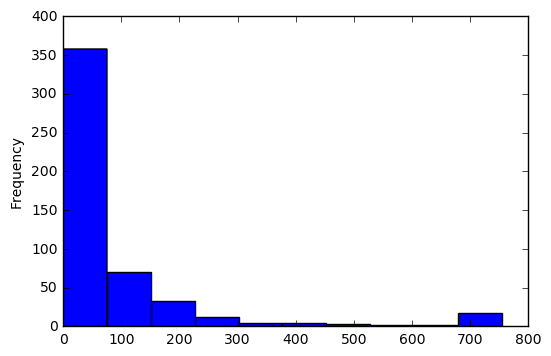

In [10]:
density_plot = Squared_errors.plot('hist')

In [11]:
def standard_deviation(variable, bias=0):
    observations = float(len(variable))
    return np.sqrt(np.sum((variable - np.mean(variable))**2) / (observations-min(bias,1)))

print ('Our function\'s result: %0.5f against Numpy\'s: %0.5f' % (standard_deviation(dataset['RM']), np.std(dataset['RM'])))

Our function's result: 0.70192 against Numpy's: 0.70192


In [12]:
def covariance(variable_1, variable_2, bias=0):
    observations = float(len(variable_1))
    return np.sum((variable_1 - np.mean(variable_1)) * (variable_2 - np.mean(variable_2))) / (observations-min(bias,1))

def standardize(variable):
    return (variable - np.mean(variable)) / np.std(variable)

def correlation(var1,var2,bias=0):
    return covariance(standardize(var1), standardize(var2),bias)

from scipy.stats.stats import pearsonr
print ('Our correlation estimation: %0.5f' % (correlation(dataset['RM'], dataset['target'])))
print ('Correlation from Scipy pearsonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0])

#print (help(np.corrcoef))

Our correlation estimation: 0.69536
Correlation from Scipy pearsonr estimation: 0.69536


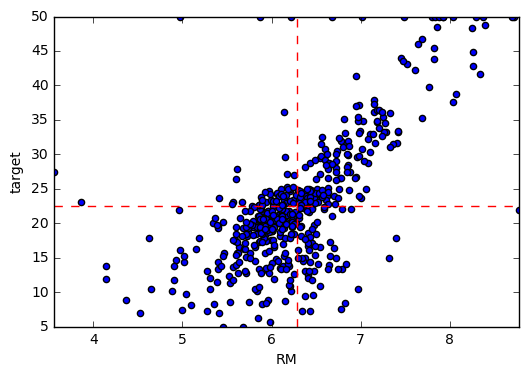

In [13]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)

## Linear regression in action: Statsmodels

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
y = dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

In [16]:
X.head()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [17]:
# As an alternative, this example is using the statsmodels.formula.api module
# Equivalent to the R syntax for linear models, it requires to specify the form
# of the linear regression using 'response ~ predictor1 (+ predictor2 + ...)'

In [18]:
linear_regression = smf.ols(formula='target ~ RM', data=dataset)
fitted_model = linear_regression.fit()

In [19]:
linear_regression = sm.OLS(y,X)
fitted_model = linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 10 Dec 2016   Prob (F-statistic):           2.49e-74
Time:                        01:52:57   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print (fitted_model.params)
betas = np.array(fitted_model.params)
fitted_values = fitted_model.predict(X)

const   -34.670621
RM        9.102109
dtype: float64


In [21]:
RM = 5
Xp = np.array([1,RM])
print ("Our model predicts if RM = %01.f the answer value is %0.1f" % (RM, fitted_model.predict(Xp)))

Our model predicts if RM = 5 the answer value is 10.8


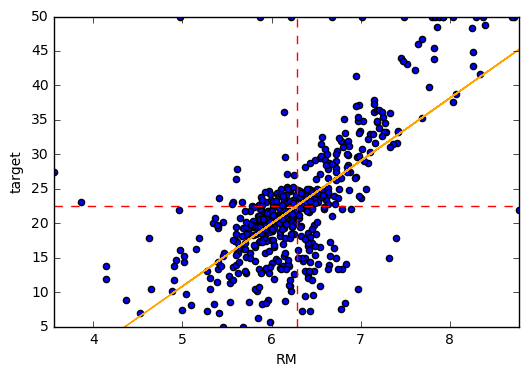

In [22]:
x_range = [dataset['RM'].min(),dataset['RM'].max()]
y_range = [dataset['target'].min(),dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY = scatter_plot.plot(x_range, [dataset['target'].mean(),dataset['target'].mean()], '--', color='red', linewidth=1)
meanX = scatter_plot.plot([dataset['RM'].mean(),dataset['RM'].mean()], y_range, '--', color='red', linewidth=1)
regression_line = scatter_plot.plot(dataset['RM'], fitted_values, '-', color='orange', linewidth=1)

In [23]:
predictions_by_dot_product = np.dot(X,betas)
print ("Using the prediction method: %s" % fitted_values[:10])
print ("Using betas and a dot product: %s" % predictions_by_dot_product[:10])

Using the prediction method: [ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155]
Using betas and a dot product: [ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155]


In [24]:
residuals = dataset['target']-fitted_values
normalized_residuals = standardize(residuals)

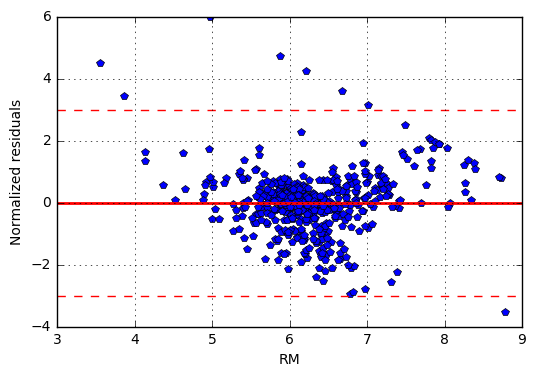

In [25]:
residual_scatter_plot = plt.plot(dataset['RM'], normalized_residuals,'bp')
plt.xlabel('RM') 
plt.ylabel('Normalized residuals') 
mean_residual = plt.plot([int(x_range[0]),round(x_range[1],0)], [0,0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [3,3], '--', color='red', linewidth=1)
lower_bound = plt.plot([int(x_range[0]),round(x_range[1],0)], [-3,-3], '--', color='red', linewidth=1)
plt.grid()

## Linear regression in action: Scikit-learn

In [26]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)

In [27]:
observations = len(dataset)
X = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
y = dataset['target'].values # y can be a vector

In [28]:
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print (linear_regression.coef_)
print (linear_regression.intercept_)

[ 9.10210898]
-34.6706207764


In [30]:
print (linear_regression.predict(X)[:10])

[ 25.17574577  23.77402099  30.72803225  29.02593787  30.38215211
  23.85593997  20.05125842  21.50759586  16.5833549   19.97844155]


In [31]:
Xp = np.column_stack((X,np.ones(observations)))
v_coef = list(linear_regression.coef_) + [linear_regression.intercept_]

In [32]:
np.dot(Xp,v_coef)[:10]

array([ 25.17574577,  23.77402099,  30.72803225,  29.02593787,
        30.38215211,  23.85593997,  20.05125842,  21.50759586,
        16.5833549 ,  19.97844155])

In [33]:
from sklearn.datasets import make_regression
HX, Hy = make_regression(n_samples=10000000, n_features=1, n_targets=1, random_state=101)

In [34]:
%%time
sk_linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
sk_linear_regression.fit(HX,Hy)

CPU times: user 644 ms, sys: 760 ms, total: 1.4 s
Wall time: 1.4 s


In [35]:
%%time
sm_linear_regression = sm.OLS(Hy,sm.add_constant(HX))
sm_linear_regression.fit()

CPU times: user 1.77 s, sys: 2.08 s, total: 3.85 s
Wall time: 3.94 s


## Cost function of a linear regression model

In [36]:
import numpy as np
x = np.array([9.5, 8.5, 8.0, 7.0, 6.0])
y = np.array([85, 95, 70, 65, 70])

In [37]:
def squared_cost(v,e):
 return np.sum((v-e)**2)

In [38]:
from scipy.optimize import fmin
xopt = fmin(squared_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 7.300000
         Iterations: 44
         Function evaluations: 88


In [39]:
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The mean is %0.1f' % (np.mean(x)))

The result of optimization is 7.8
The mean is 7.8


In [40]:
np.mean(x)

7.7999999999999998

In [41]:
def absolute_cost(v,e):
 return np.sum(np.abs(v-e))

In [42]:
xopt = fmin(absolute_cost, x0=0, xtol=1e-8, args=(x,))

Optimization terminated successfully.
         Current function value: 5.000000
         Iterations: 44
         Function evaluations: 88


In [43]:
print ('The result of optimization is %0.1f' % (xopt[0]))
print ('The median is %0.1f' % (np.median(x)))

The result of optimization is 8.0
The median is 8.0


## Cost function minimization

In [44]:
observations = len(dataset)
X  = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
Xb = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

def matrix_inverse(X,y, pseudo=False):
    if pseudo:
        return np.dot(np.linalg.pinv(np.dot(X.T, X)),np.dot(X.T,y))
    else:
        return np.dot(np.linalg.inv(np.dot(X.T, X)),np.dot(X.T,y))

def normal_equations(X,y):
    return np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

print (matrix_inverse(Xb, y))
print (matrix_inverse(Xb, y, pseudo=True))
print (normal_equations(Xb, y))

[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]
[  9.10210898 -34.67062078]


## Gradient descent at work

In [45]:
observations = len(dataset)
X  = dataset['RM'].values.reshape((observations,1)) # X should be always a matrix, never a vector
X = np.column_stack((X,np.ones(observations))) # We add the bias
y  = dataset['target'].values # y can be a vector

In [46]:
import random

def random_w( p ):
    return np.array([np.random.normal() for j in range(p)])

def hypothesis(X,w):
    return np.dot(X,w)

def loss(X,w,y):
    return hypothesis(X,w) - y

def squared_loss(X,w,y):
    return loss(X,w,y)**2

def gradient(X,w,y):
    gradients = list()
    n = float(len( y ))
    for j in range(len(w)):
        gradients.append(np.sum(loss(X,w,y) * X[:,j]) / n)
    return gradients

def update(X,w,y, alpha=0.01):
    return [t - alpha*g for t, g in zip(w, gradient(X,w,y))]

def optimize(X,y, alpha=0.01, eta = 10**-12, iterations = 1000):
    w = random_w(X.shape[1])
    path = list()
    for k in range(iterations):
        SSL = np.sum(squared_loss(X,w,y))
        new_w = update(X,w,y, alpha=alpha)
        new_SSL = np.sum(squared_loss(X,new_w,y))
        w = new_w
        if k>=5 and (new_SSL - SSL <= eta and new_SSL - SSL >= -eta):
            path.append(new_SSL)
            return w, path
        if k % (iterations / 20) == 0:
            path.append(new_SSL)
    return w, path
                                  
alpha = 0.048
w, path = optimize(X,y,alpha, eta = 10**-12, iterations = 25000)
print ("These are our final coefficients: %s" % w)
print ("Obtained walking on this path of squared loss %s" % path)

# Just as a reminder, we previously estimated by other methods that
# the best solution for our coefficients is w = [9.10210898, -34.67062078]

These are our final coefficients: [9.1021028185322326, -34.670581575106922]
Obtained walking on this path of squared loss [314821.78957607463, 23922.795167966699, 22501.351196965094, 22165.664451633067, 22086.3890153229, 22067.667409869129, 22063.246134792251, 22062.202011020196, 22061.955431824728, 22061.897199935695, 22061.883447952707, 22061.880200298558, 22061.879433335896, 22061.87925221078, 22061.879209436462, 22061.879199334919, 22061.879196949354, 22061.879196385984, 22061.879196252929, 22061.879196221518, 22061.879196221387]
